<a href="https://colab.research.google.com/github/mrudan2020/pucrj-mvp1/blob/main/MVP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Doc de entendimento e uso

O presente código consiste nas dependências (Libs, classes, funcoes, etc.) Além disso, o código foi contruido pautado em OO, possuindo uma metafora propria que explica e latreia suas funcoes com a realidade

O presente código consiste nas dependências (Libs, classes, funcoes, etc.)
Além disso, o código foi contruido pautado em OO, possuindo uma metafora propria que explica e latreia suas funcoes com a realidade

# Definicao do Problema

1.   Qual é a descrição do problema? R: O estresse, e consquentemente desgaste entre colaboradores é algo comum dentro do ambiente corporativo, através de info históricas é possivel mapear estudar e traçar planos de acao para minimizar este problema
2.   Este é um problema de aprendizado supervisionado ou não supervisionado? R: É possível utilizar ambas as premissas para atacar este problema. No entanto, olhando de maneira preventiva, faz mais sentido adotarmos uma estrtégia supervisionada, pois possuímos nos dados um target (pessoas com estresse/cansaço), ou seja temos potencial em prever quais colaboradores estarão mais sucetiveis ao desgaste de trabalho
3.   Que premissas ou hipóteses você tem sobre o problema? R: Incialmente é esperado que o tempo de trabalho, tempo de trabalho sem gozo de férias podem ser os principais ofensores. Outro ponto a ser entendido é se a frequência de desgaste dos trabalhadores vem aumentando ou diminuindo ao longo do tempo


# Dados Utilizado

O dados de estudo foi capturado no Kaggle ("https://www.kaggle.com/datasets/rishikeshkonapure/hr-analytics-prediction")

Este dataset possui ao tod 35 variaveis, sendo uma delas "Attrition" uma info boolena que indica se um determinado colaborador apresentou ou nao desgaste no ambiente de trabalho. Esta variavel sera a principal fonte de interesse

## Demais variaveis presentes no dataset

*   Age: idade de cada colaborador
*   Attrition: apresentou cansaço/desgaste
*   BusinessTravel: frequencia de viagens a trabalho
*   DailyRate: salario diario
*   Department: area de atuacao
*   DistanceFromHome: distacia casa-trabalho
*   Education: nivel de qualificacao
*   EducationField: area de formacao
*   EmployeeCount: qutdd de funicionarios
*   EmployeeNumber: num de colaboradores 
*   EnvironmentSatisfaction: satisfacao com o ambiente de trabalho
*   Gender: genero
*   HourlyRate: salario por hora
*   JobInvolvement: relacao com o trabalho
*   JobLevel: nivel de trabalho
*   JobRole: funcao
*   JobSatisfaction: nivel de satisfacao com o trabalho
*   MaritalStatus: estado civil
*   MonthlyIncome: renda mensal
*   MonthlyRate: taxa mensais
*   NumCompaniesWorked: numero de empresas ja trabalhadas
*   Over18: é maior de 18 anos
*   OverTime: faz horas extras
*   PercentSalaryHike: porcentagem de aumento de salario
*   PerformanceRating: nivel de perfomance
*   RelationshipSatisfaction: Nivel de satisfacao com a equipe de trabalho
*   StandardHours: numero min de horas trabalhadas por semana
*   StockOptionLevel: nivel de participacao na companhia
*   TotalWorkingYears: tempo de trabalho em anos
*   TrainingTimesLastYear: num de treinamentos ano interior
*   WorkLifeBalance: equilibrio trabalho vida pessoal
*   YearsAtCompany: tempo na empresa (anos)
*   YearsInCurrentRole: tempo no atual cargo
*   YearsSinceLastPromotion: tempo em promocao
*   YearsWithCurrManager: tempo sob a mesma gestao

## Metafora

### Classe

A **metafora** utilizada para as classes foi ***Aeroporto***. 

Para entender, devemos lembrar como funciona o fluxo de passageiros e bagagens (DADOS) antes de partirem em viagem, com etapas de controle, validacao e seguranca

### Subclasses

HallCheckin: Responsavel por receber as info dos passageiros e bagagens (dados).

EsteiraBagagens: Responsavel por conduzir as bagagens pelos processos de validação ate seu ponto **final**

Alfandega: Responsavel por fiscalizar, auditar e liberar os dados ao seu destino final (Uso)

# Utils

### Instalacao de Libs

In [1]:
!pip install import-ipynb==0.1.4
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Libs

In [2]:
import import_ipynb
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import sklearn.cluster as cluster
from sklearn.cluster import KMeans

### Configurações pandas

In [3]:
# Definindo as opções de configuração para pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Funcoes (def)

In [4]:
#para ler o arquivo de um ambiente local

def upload_arquivos():
  print("Selecione o arquivo 'HR-Employee-Attrition.csv'")
  uploaded = files.upload()
  for arquivo in uploaded.keys():
    print('Arquivo "{name}" com tamanho de {length} bytes foi enviado com sucesso.'.format(
    name=arquivo, length=len(uploaded[arquivo])))
  return(arquivo)

## Classes

### Aeroporto

In [5]:
#Classe principal do código Aeroporto
##A partir desta classe haverao subclasses seguindo a dinamica de aeroportos para facilitar o entendimento de o codigo
class Aeroporto:
  def __init__(self, aeroporto, destino_do_voo, origem_do_dado, local_da_bagagem):
    self.aeroporto=aeroporto
    self.destino_do_voo=destino_do_voo
    self.origem_do_dado=origem_do_dado
    self.local_da_bagagem=local_da_bagagem


### HallCheckin (importacao de dados)

In [6]:
from pandas._libs.tslibs.vectorized import dt64arr_to_periodarr
from numpy import datetime64
#Como o proprio nome diz, aqui é esperado a chegada e importacao dos dados
##Algumas verificacoes tambem sao feitas e documentadas garantindo o registro e rastreio dos dados originalmente
class HallCheckin(Aeroporto):
  def __init__(self, nome_aeroporto):
    super().__init__(nome_aeroporto.aeroporto, 
                     nome_aeroporto.destino_do_voo, 
                     nome_aeroporto.origem_do_dado, 
                     nome_aeroporto.local_da_bagagem)
    pass

  def despacho_bagagem_df(self):
    self.registro_bagagem=self.bagagem_checkin.info()
    self.itens_na_bagagem=self.bagagem_checkin.dtypes
    self.pesagem_bagagem_df()
#potencial implementacao de controle de dados
    '''print("Estes dados são sensíveis no contexto de LGPD?")
    while True:
      self.sensibilidade_dados=input("Digite 's' para SIM ou 'n' para NÃO")
      if self.sensibilidade_dados == "s":
        print("Ok, sera necessario anonimizar algumas info por conta de LGPD")
        break
      elif self.sensibilidade_dados == "n":
        print("ok, não haverá anonimizacao de dados")
        break
      else:
        print("Desculpe, não entendi a sua resposta.")'''
    print('Bagagem despachada com sucesso')

  def ler_csv(self):
    self.bagagem_checkin=pd.read_csv(self.local_da_bagagem)
    self.despacho_bagagem_df()
    
  def pesagem_bagagem_df(self):
    print("organizando os dados em qualitativos e quantitativos")
    self.quantitativos=self.bagagem_checkin.select_dtypes(include=['float', 'int'])
    self.quali_discretos=self.bagagem_checkin.select_dtypes(include=['bool'])
    self.temporal=self.bagagem_checkin.select_dtypes(include=['datetime64'])
    self.nominais=self.bagagem_checkin.select_dtypes(include=['object'])



### Alfandega (analise, exploracao e liberacao dos dados)

In [7]:
class Alfandega(Aeroporto):
  def __init__(self, nome_aeroporto):
    super().__init__(nome_aeroporto.aeroporto, 
                     nome_aeroporto.destino_do_voo, 
                     nome_aeroporto.origem_do_dado, 
                     nome_aeroporto.local_da_bagagem)
    
  def inspecionar_dados_quanti(self, dados_quanti_df):
    sns.boxplot(data=dados_quanti_df)
    plt.title("Boxplot das variaveis quantitativas")

  def inspecionar_dados_quanti_norm(self, dados_quanti_df):
    scaler = MinMaxScaler()
    
    df_norm = pd.DataFrame(scaler.fit_transform(dados_quanti_df), columns=dados_quanti_df.columns)
    plt.title("Boxplot das variaveis quantitativas (Normalizados)")
    return(sns.boxplot(data=df_norm))

  def comportamento_dos_dados_quanti(self, dados_df_quanti):
    return(dados_df_quanti.corr().style.background_gradient(cmap='coolwarm'))

  def raiox_de_palavras(self, dados_df_quanti):
    palavras = []
    for coluna in dados_df_quanti.columns:
        palavras.extend(santos_dumont_checkin.nominais[coluna].tolist())

    # gerar a nuvem de palavras
    nuvem_palavras = WordCloud(width=800, height=400, background_color='black').generate(' '.join(set(palavras)))

    # plotar a nuvem de palavras
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

  def alimentacao(self, df_col):
    # Contando a frequência de cada valor
    freq = df_col.value_counts()
    # Plotando o gráfico de pizza
    plt.pie(freq.values, labels=freq.index)
    plt.show()

  def unir_as_info(self, df1, df2):
    df_concat = pd.concat([df1, df2], axis=1)
    self.bagagem_checkout=df_concat

  def agrupar_individuos(self, df):
    scale = MinMaxScaler()
    df = scale.fit_transform(df)
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=1357)
        kmeanModel.fit(df)
        distortions.append(kmeanModel.inertia_)

    variabilidade_dos_grupos = pd.DataFrame({'variabilidade':distortions})
    distortions = (variabilidade_dos_grupos /variabilidade_dos_grupos.sum()).cumsum()

    patamar = 0.8
    num_clus = distortions[distortions['variabilidade'] >= patamar].index[0]
    self.num_clus = num_clus
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Variabilidade Interclus')
    plt.title('Pareto para otimizar o número de clusteres')
    plt.show()

    kmeans = cluster.KMeans(num_clus, random_state=1357)
    kmeans = kmeans.fit(df)
    
    return(kmeans.predict(df))

# Main

## Importacao Dados

In [8]:
#bagagem = upload_arquivos()

url_da_bagagem="https://raw.githubusercontent.com/mrudan2020/pucrj-mvp1/main/HR-Employee-Attrition.csv"

print('Instanciando o objeto santos dumont na classe aeroporto')
print('Aqui contem info basicas referentes ao dado e ao estudo de interesse sobre ele')
print("Independete de qual parte do cód estamos olhando, sera sempre possivel consultar estas info")
santos_dumont = Aeroporto(aeroporto='MVP1',
                          destino_do_voo='Prevencao/previsao do desgaste no ambiente de trabalho', 
                          origem_do_dado='kaggle: hr-analytics-prediction', local_da_bagagem=url_da_bagagem)

Instanciando o objeto santos dumont na classe aeroporto
Aqui contem info basicas referentes ao dado e ao estudo de interesse sobre ele
Independete de qual parte do cód estamos olhando, sera sempre possivel consultar estas info


In [9]:
print("Aqui inicia o checkin dos dados, na classe HallChekin ficaram estabelecidos os leitores de dados")
print("A principio, teremos apenas o leitor de csv, o que nao impossibilita a implementacao de novos leitores (ex: xlsx, web, txt, queries, etc.")
print("incialmente ha uma tag indicando presenca ou nao de dados sensiveis, esta tag podera ser util em implementacoes futuras com interesse em anonimizar info")

santos_dumont_checkin=HallCheckin(santos_dumont)
santos_dumont_checkin.ler_csv() #Sem dados faltantes

Aqui inicia o checkin dos dados, na classe HallChekin ficaram estabelecidos os leitores de dados
A principio, teremos apenas o leitor de csv, o que nao impossibilita a implementacao de novos leitores (ex: xlsx, web, txt, queries, etc.
incialmente ha uma tag indicando presenca ou nao de dados sensiveis, esta tag podera ser util em implementacoes futuras com interesse em anonimizar info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField

## Exploracao

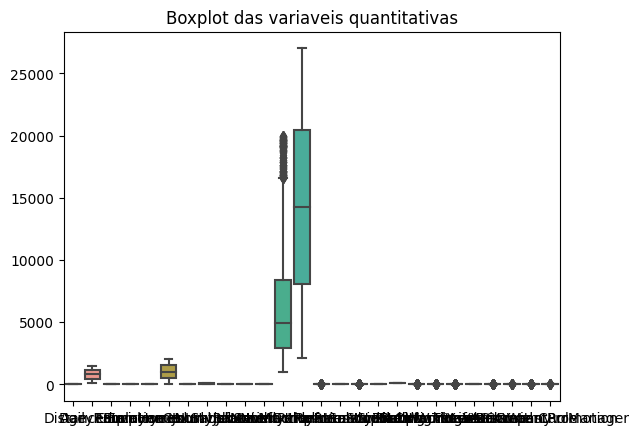

In [10]:
policia_federal=Alfandega(santos_dumont)
policia_federal.inspecionar_dados_quanti(santos_dumont_checkin.quantitativos)
#Aqui notamos que a escala de cada variavel dificulta a visualizacao dos graficos
#A seguir iremos normalizar os dados para facilitar a vizualização do comportamento dos dados

26

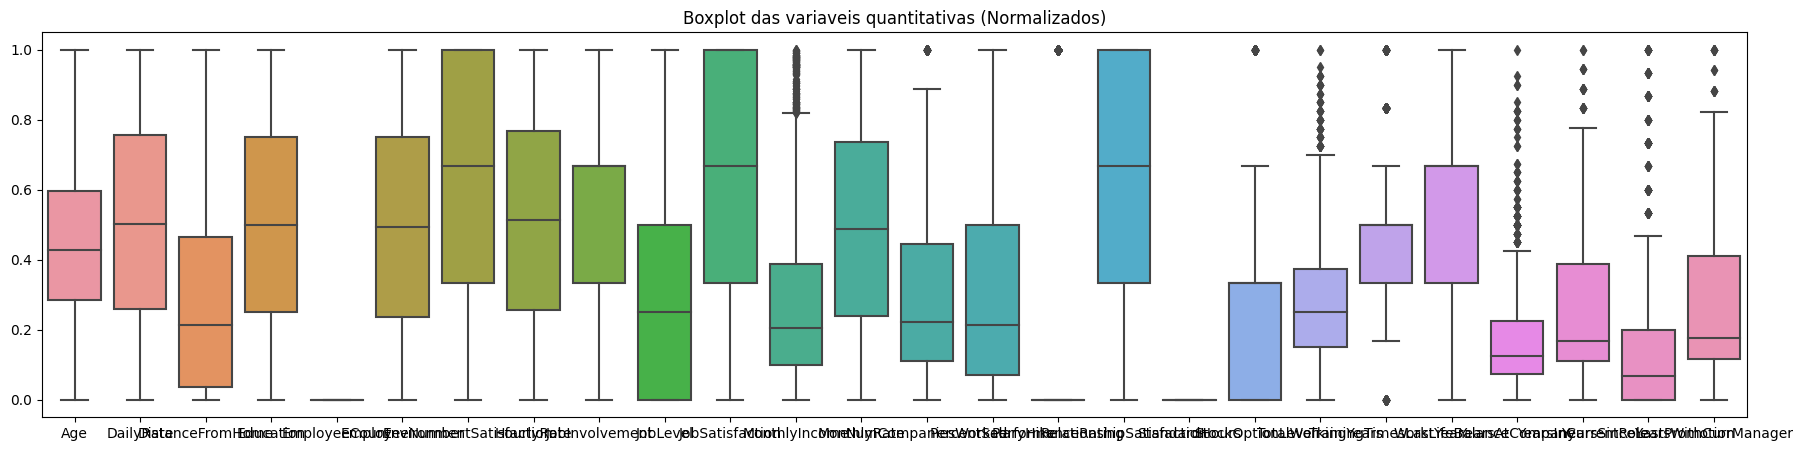

In [11]:
plt.figure(figsize=(22,5))
policia_federal.inspecionar_dados_quanti_norm(santos_dumont_checkin.quantitativos)
#Apesar da normalizacao dos dados ter gerado efeito na distribuicao dos dados
#Ainda é muito dificil a analise devido ao grande numero de variaveis

santos_dumont_checkin.quantitativos.shape[1] # grade numero de colunas (26). Iremos gerar 2 graficos para facilitar o trabalho

### **Primeiras percepcoes**

Houve a necessidade de normalizar os dados para facilitar a interpretacao do comportamento dos dados

Apesar de termos 2 variaveis quantitativas, é facil notar que o comportamento destas difere muito, especialemente em suas distribuicoes

Notamos no último plot, que as variaveis ['TrainingTimesLastYear', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'] possuem uma grande quantidade de outliers

Este efeito pode estar associado a natureza do dado, sendo estes com comportamento de distribuicao distintos ou falha (erro) no preenchimento dos mesmos

Aos demais dados, abre-se um apossibilidade para testes de hipótese paramétricos a depender da análise

## Variaveis Quantitativas

### 1º Graf

No boxplot abaixo é possivel notar um coportamento dos dados sem a presença de outliers ou anomalias

Aléms disso, é muito provavel uma distribuicao normal desteas (dados parametricos), com excecao da variavel EmployeeCount. Inclusive esta variavel pode ser desconsiderada (**excluida das nossas analises**) pois ela apenas computa o numero de colabores referentes aos demais atributos, não apresentando info relevante e até mesmo variabilidade

<Axes: title={'center': 'Boxplot das variaveis quantitativas (Normalizados)'}>

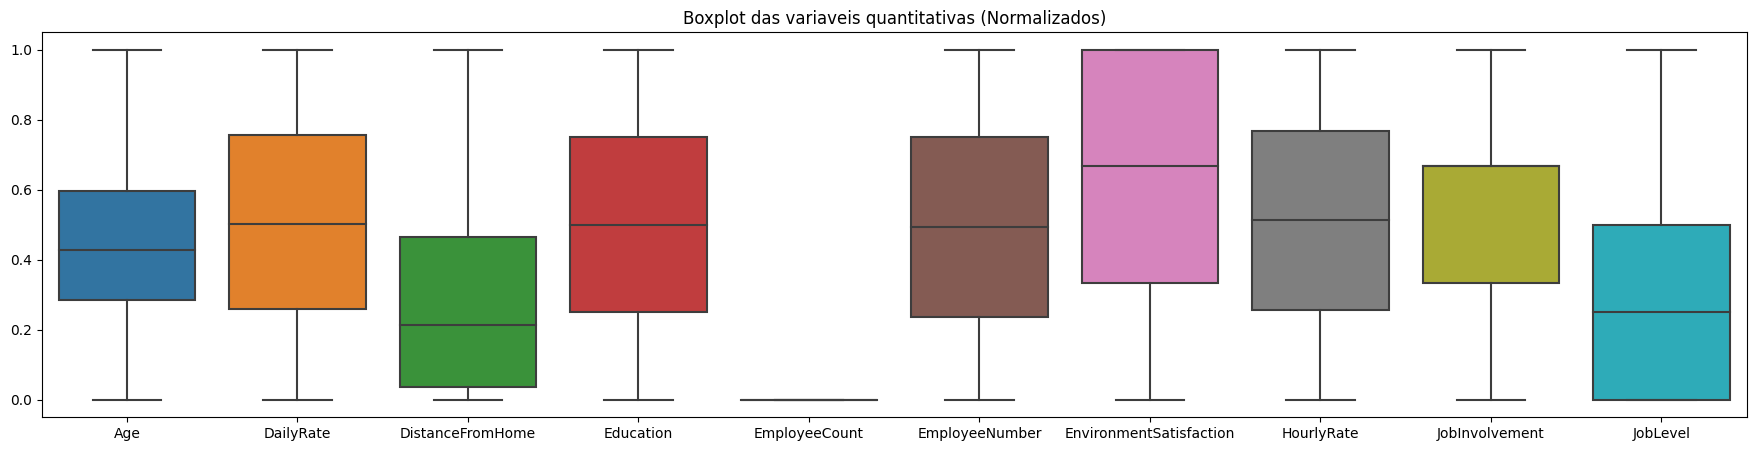

In [12]:
plt.figure(figsize=(22,5))
policia_federal.inspecionar_dados_quanti_norm(santos_dumont_checkin.quantitativos.iloc[:, 0:10])

In [13]:
santos_dumont_checkin.quantitativos.iloc[:, 0:10].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000


### 2º Graf

Na analise abaixo é possivel observarmos a presença de alguns outliers.

MonthlyIncome: Dificil identificar possiveis erros aqui, pois a receita total de cada colaborador pode ser autodeclarativa, é possivel que alguns colaboradores tenham valores muito acima aos demais

NumCompaniesWorked: possui poucos outliers, de tal modo que poderiam ser excluídos sem comprometer o volume e analised dos dados assim

PerformanceRating: Quando olhamos a distribuicao (decribe) é possivel ver que o valor 3 representa mais de 75% dos dados. Em uma análise mais detalhada é possivel notar que apenas 15% (>=q85) apresentaram o valor máximo de perfomance. Estes numeros fazem muito sentido, pois não é esperado dentro de uma companhia que todos ou a maioria dos colaboradores tenha uma alta performance.

StockOptionLevel: os outliers apresentadosé um possível reflexo ao baixo numero de colaboradores com beneficio de adquirir acoes da empresa, proporcionalmente ao total de colaboradores. Isto pode ser devido a este beneficio ser realmente para poucos ou talvez por ser algo implementado de maneira recente, o que explicaria a distribuicao observada

TotalWorkingYears: o tempo de mercado (historico de anos ja trabalhados) acaba sendo uma info muito especifica de cada funcionario, mas com valores coerente. Vale uma regra de checagem entre esta variavel vs a variavel tempo trabalhando na empresa, onde é esperado:

TotalWorkingYears >= YearsAtCompany

StandardHours: também pode ser **excluida** das nossas analises por ser um valor padronizado (legislacao) e fixo para todos os colaboradores. Esta falta de variabilidade deixa de agregar em potenciais analises ou modelos.

*Vale lembrar que futuramente, caso existam alterações na legislação trabalhista de modo que a quantidade de horas semanais trabalhadas seja alterada, então poderemos rever esta etapa de exclusão desta info

<Axes: title={'center': 'Boxplot das variaveis quantitativas (Normalizados)'}>

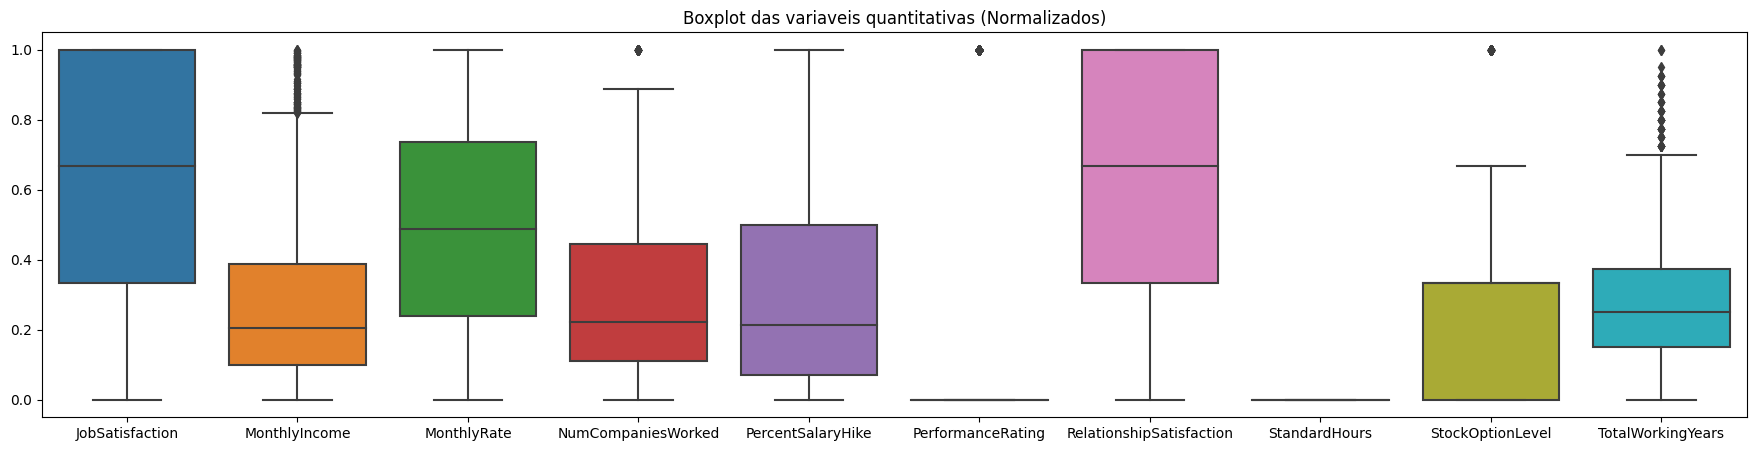

In [14]:
plt.figure(figsize=(22,5))
policia_federal.inspecionar_dados_quanti_norm(santos_dumont_checkin.quantitativos.iloc[:, 10:20])

In [15]:
santos_dumont_checkin.quantitativos.iloc[:, 10:20].describe()

,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000
mean,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592
std,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782
min,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000
25%,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000
50%,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000
75%,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000
max,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000


In [16]:
porcentagem_quantile = 0.845
santos_dumont_checkin.quantitativos['PerformanceRating'].quantile(porcentagem_quantile)

3.0

### 3º Graf

Neste gráfico é onde mais observamos outliers, principalmente com as variaveis que têm lastro com tempo.

Em cima disto sera feito uma validacao entre as variaveis para garantir a coerencia entre estes dados de modo que:

Tempo total de anos trabalhados de um colaborador **deve >=** Tempo na companhia

Tempo na companhia **deve >=** Tempo de atuacao na funcao atual **&** Tempo desde a última promoção **&** Tempo sob a mesma gestao

<Axes: title={'center': 'Boxplot das variaveis quantitativas (Normalizados)'}>

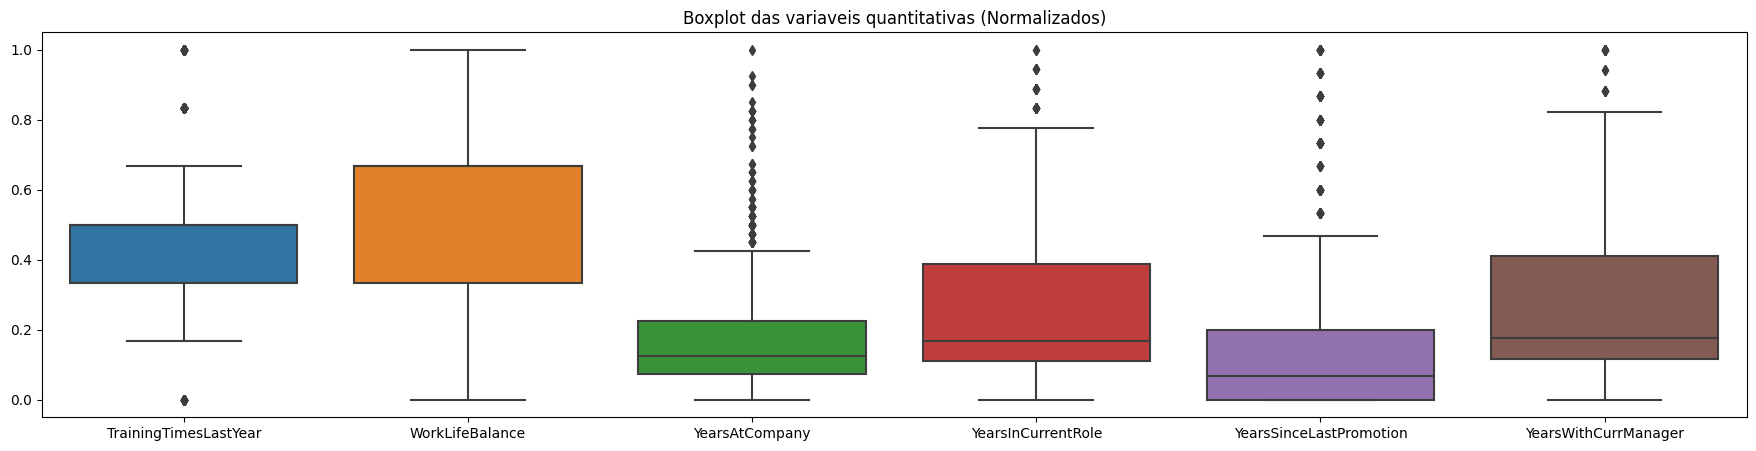

In [17]:
plt.figure(figsize=(22,5))
policia_federal.inspecionar_dados_quanti_norm(santos_dumont_checkin.quantitativos.iloc[:, 20:26])

In [18]:
santos_dumont_checkin.quantitativos.iloc[:, 20:26].describe()

,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Removendo a colunas de dados

In [19]:
santos_dumont_checkin.quantitativos.drop(['EmployeeCount', 'StandardHours'], axis=1, inplace=True)

Conforme comentado no primeiro grafico a variavel 'EmployeeCount' será descartada das nossas analises 

### Validacao de Coerencia dos dados de tempo

### Teste 1

Text(0, 0.5, 'Anos na Empresa')

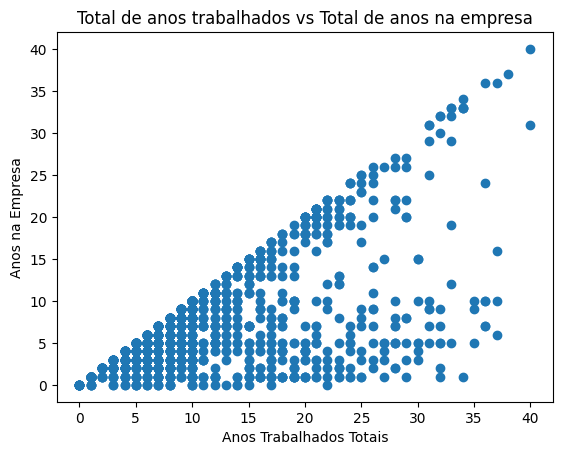

In [20]:
plt.scatter(santos_dumont_checkin.quantitativos['TotalWorkingYears'],
            santos_dumont_checkin.quantitativos['YearsAtCompany'])

# definindo o título e os rótulos dos eixos
plt.title('Total de anos trabalhados vs Total de anos na empresa')
plt.xlabel('Anos Trabalhados Totais')
plt.ylabel('Anos na Empresa')

In [21]:
porcentagem_de_coerencia_1 = 100*sum(santos_dumont_checkin.quantitativos['TotalWorkingYears']>=santos_dumont_checkin.quantitativos['YearsAtCompany'])/santos_dumont_checkin.quantitativos.shape[0]

print(f"O valor de coerencia para esta 1ª regra de negocio é de  {porcentagem_de_coerencia_1}%.")

O valor de coerencia para esta 1ª regra de negocio é de  100.0%.


Através da distribuicao dos dados é possível confirmar o padrão crescente os variaveis tempo de trabalho na empresa vs tempo de trabalho total

Além disso, podemos notar que praticamente todos os trabalhadores com <= 10 anos de experiencia profissional estão em seu primeiro emprego dentro da própria companhia.

Outro ponto interessante é que a empresa, mesmo que em menor escala, conseguiu manter funcionarios desde o sua fundacao (40 anos) com foco para um colaborador com 40 anos de experiencia profissional e na mesma companhia (seria o fundador?)

Neste 1º teste é possível confirmar os valores temporais do primeiro teste estão 100% coerentes e aderentes ao esperado

### Teste 2

In [22]:
porcentagem_de_coerencia_2 = 100*sum(santos_dumont_checkin.quantitativos['YearsAtCompany'] >= santos_dumont_checkin.quantitativos['YearsInCurrentRole'] & 
                                   santos_dumont_checkin.quantitativos['YearsSinceLastPromotion'] & 
                                   santos_dumont_checkin.quantitativos['YearsWithCurrManager'])/santos_dumont_checkin.quantitativos.shape[0]

print(f"O valor de coerencia para esta 2ª regra de negocio é de  {porcentagem_de_coerencia_2}%.")

O valor de coerencia para esta 2ª regra de negocio é de  100.0%.


## Correlação das Variáveis

In [23]:
policia_federal.comportamento_dos_dados_quanti(santos_dumont_checkin.quantitativos)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,0.000644,-0.055699,0.020002,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


### Comentarios

Analisando a matriz de correlacao fica facil observar o comportamento dos dados 1:1.

Esta info é interessante para confrontarmos algumas premissas hipoteses intuitivas com os dados.

Além disso, variaveis com elevada correlacao entre si podem trazer overfit a um futuro modelo supervisionado, sendo importante avaliar com cuidado a seleção das variaveis que poderão compor este modelo

Muitas análises são possíveis serem feitas a partir do gráfico acima. Mas uma chama a atenção, inclusive por ter sido apontado anteriormente. Fica claro a forte correlção (r = 77%) entre aumento de salário e avaliação de performance, ou seja, esta companhia tende a praticar boa parte de suas bonificações salariais ao nível de performance dos colaboradores

Outra correlação que também chama a atenção (r = 76,7%) está sobre o tempo de empresa e o tempo sob o atual gestor. Portanto, quanto maior o tempo de empresa maior será o tempo sob um mesmo gestor, isto pode indicar 2 hipóteses:

1) os gestores desta empresa tem muito tempo de empresa e já estão confortáveis e aparentemente estáveis (baixo risco de turn over)

2) este comportamento pode indicar uma dificuldade de construir novos gestores são formados apenas comm tempo ou (aparentemente) com a aposentadoria dos atuais.

No longo prazo isto pode se tornar um ponto de atenção, fazendo sentido desde já a criação de possíveis linhas sucessórias

## Correlação das variaveis onde ocorreu desgaste dos colaboradores

In [24]:
df_quanti_com_desgaste=santos_dumont_checkin.bagagem_checkin[santos_dumont_checkin.bagagem_checkin['Attrition'] == 'Yes'][santos_dumont_checkin.quantitativos.columns]

policia_federal.comportamento_dos_dados_quanti(df_quanti_com_desgaste)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.009640,0.033881,0.192184,0.048357,-0.030219,0.112644,0.070830,0.500386,0.031509,0.500602,-0.070142,0.349638,-0.020759,-0.033040,0.128509,0.150161,0.672621,-0.056433,-0.075944,0.452909,0.384303,0.329246,0.336577
DailyRate,0.009640,1.000000,-0.080002,-0.048073,-0.041120,-0.019782,0.080470,0.035421,0.017825,0.005118,0.020175,-0.135200,0.091391,-0.046404,-0.011172,-0.059042,-0.034317,0.000203,-0.016391,0.026762,-0.072555,-0.035748,-0.067234,-0.022054
DistanceFromHome,0.033881,-0.080002,1.000000,0.044774,0.056168,0.019447,-0.013819,0.039637,0.083905,-0.046744,0.038948,0.014747,-0.121304,0.137674,0.102790,0.042372,0.025690,0.004146,-0.041019,-0.060009,-0.029204,-0.041440,-0.006959,-0.009864
Education,0.192184,-0.048073,0.044774,1.000000,0.079936,-0.037230,0.023586,0.112600,0.112644,-0.075939,0.105162,-0.004583,0.056101,0.015257,-0.012334,0.085021,0.068913,0.170176,-0.064541,-0.102884,0.157490,0.104989,0.141172,0.132882
EmployeeNumber,0.048357,-0.041120,0.056168,0.079936,1.000000,0.046517,0.064489,0.104871,0.011944,-0.112501,0.000209,-0.014304,-0.002654,-0.065988,-0.034016,-0.078919,0.144574,-0.005427,-0.065952,0.010787,0.006834,-0.013633,0.014126,0.003141
EnvironmentSatisfaction,-0.030219,-0.019782,0.019447,-0.037230,0.046517,1.000000,-0.021467,0.093255,-0.081197,0.046915,-0.089457,0.032915,-0.167016,0.051231,-0.001723,0.000299,-0.071978,-0.058569,0.035530,-0.099402,0.031420,0.006475,0.104580,0.000282
HourlyRate,0.112644,0.080470,-0.013819,0.023586,0.064489,-0.021467,1.000000,0.067985,0.020474,-0.124763,0.018204,-0.015693,-0.008655,-0.059112,-0.041284,0.028568,-0.069107,0.030602,0.058646,-0.071140,0.015526,-0.047729,-0.088223,-0.011530
JobInvolvement,0.070830,0.035421,0.039637,0.112600,0.104871,0.093255,0.067985,1.000000,0.003687,-0.047079,-0.008321,-0.001693,-0.017865,-0.014439,-0.033176,0.025819,0.045594,0.011386,-0.082130,0.040517,-0.026785,-0.012189,0.032574,0.026431
JobLevel,0.500386,0.017825,0.083905,0.112644,0.011944,-0.081197,0.020474,0.003687,1.000000,0.033356,0.945540,0.072406,0.176461,-0.117876,-0.118573,0.070159,0.065013,0.742761,-0.094405,-0.013200,0.614977,0.533033,0.440454,0.471937
JobSatisfaction,0.031509,0.005118,-0.046744,-0.075939,-0.112501,0.046915,-0.124763,-0.047079,0.033356,1.000000,0.004767,0.150942,-0.030340,-0.147534,-0.138880,0.095951,0.081676,-0.002202,-0.028139,-0.042071,0.095849,0.060608,0.091455,0.005296


## Correlação das variaveis onde Não ocorreu desgaste dos colaboradores

In [25]:
df_quanti_sem_desgaste=santos_dumont_checkin.bagagem_checkin[santos_dumont_checkin.bagagem_checkin['Attrition'] == 'No'][santos_dumont_checkin.quantitativos.columns]

policia_federal.comportamento_dos_dados_quanti(df_quanti_sem_desgaste)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.000007,0.005828,0.208739,-0.024071,-0.001000,0.005158,-0.005037,0.497797,-0.033143,0.486713,0.052284,0.301987,0.006324,0.009863,0.028981,-0.012452,0.672753,-0.024100,-0.021222,0.264745,0.158121,0.190892,0.154146
DailyRate,0.000007,1.000000,0.015425,-0.013103,-0.053613,0.019345,0.012215,0.040008,-0.010678,0.028742,-0.004482,-0.011258,0.030215,0.035506,0.002914,0.018157,0.048172,0.005735,0.001945,-0.057386,-0.036447,0.006929,-0.029210,-0.038031
DistanceFromHome,0.005828,0.015425,1.000000,0.019373,0.029550,-0.014166,0.040857,0.014510,0.007809,0.015008,-0.011321,0.028762,-0.013295,0.021266,0.011508,0.003340,0.062549,0.020947,-0.030805,-0.012445,0.029983,0.044839,0.016516,0.033575
Education,0.208739,-0.013103,0.019373,1.000000,0.034885,-0.029207,0.015267,0.023233,0.095539,-0.002839,0.089564,-0.029642,0.142676,-0.016764,-0.026763,-0.029458,0.003809,0.140810,-0.020184,0.032791,0.048644,0.047987,0.037161,0.053890
EmployeeNumber,-0.024071,-0.053613,0.029550,0.034885,1.000000,0.010649,0.029795,-0.031568,-0.025655,-0.035435,-0.019142,0.017864,-0.000421,-0.003038,-0.017799,-0.068836,0.045845,-0.018282,0.038853,0.009447,-0.016292,-0.009714,-0.013578,-0.013258
EnvironmentSatisfaction,-0.001000,0.019345,-0.014166,-0.029207,0.010649,1.000000,-0.056943,-0.048973,-0.005309,-0.031494,-0.012947,0.040775,0.059159,-0.051598,-0.035268,0.003524,0.002085,-0.013539,-0.038144,0.051394,-0.021621,0.000527,-0.005834,-0.025595
HourlyRate,0.005158,0.012215,0.040857,0.015267,0.029795,-0.056943,1.000000,0.036972,-0.037420,-0.062331,-0.022225,-0.015100,0.028899,0.000620,0.005309,-0.004448,0.072647,-0.009520,-0.021362,0.009875,-0.027368,-0.021918,-0.015675,-0.023118
JobInvolvement,-0.005037,0.040008,0.014510,0.023233,-0.031568,-0.048973,0.036972,1.000000,-0.042686,-0.032892,-0.041844,-0.017263,0.029893,-0.020169,-0.028053,0.029242,-0.005347,-0.036390,-0.011135,-0.039510,-0.042243,-0.012526,-0.041577,0.001949
JobLevel,0.497797,-0.010678,0.007809,0.095539,-0.025655,-0.005309,-0.037420,-0.042686,1.000000,-0.028654,0.949976,0.038004,0.148688,-0.024260,-0.005220,0.004664,-0.021659,0.781068,-0.018481,0.035580,0.510764,0.349929,0.340457,0.342387
JobSatisfaction,-0.033143,0.028742,0.015008,-0.002839,-0.035435,-0.031494,-0.062331,-0.032892,-0.028654,1.000000,-0.028556,-0.027342,-0.056060,0.052447,0.030584,-0.040616,-0.020536,-0.045290,-0.008960,-0.022626,-0.039733,-0.032920,-0.043382,-0.053233


Quando analisamos as correlacao no recorte dos dados considerando o fator de desgaste dos colaboradores, percebemos o comportamento dos graficos é muito similar não havendo grande efeito aparente do recorte.

No entanto, um valor de correlação salta (antes r = 74%) para 81%. No caso a relação tempo de companhia vs tempo no função atual. Indicando que o aumento de tempo de casa não resulta em maior tempo na mesma função (sem mudança de cargo)

# Variáveis Qualitativas

### Nuvem de Palavras

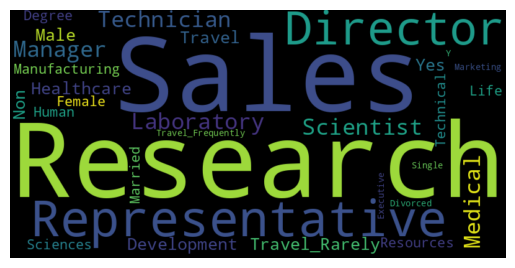

In [26]:
policia_federal.raiox_de_palavras(santos_dumont_checkin.nominais)

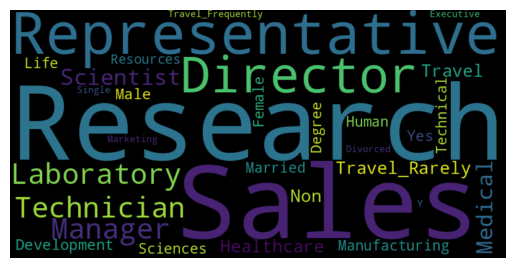

In [27]:
policia_federal.raiox_de_palavras(santos_dumont_checkin.nominais[santos_dumont_checkin.nominais['Attrition']=='Y'])

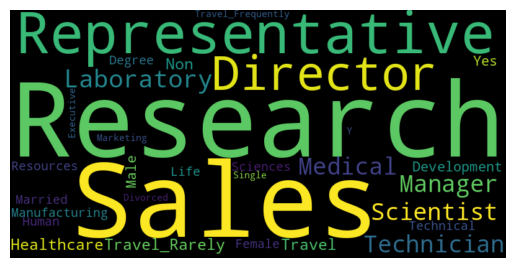

In [28]:
policia_federal.raiox_de_palavras(santos_dumont_checkin.nominais[santos_dumont_checkin.nominais['Attrition']=='N'])

Ao fim das nuvens de palavras não fica claro um tendencia ou uma maior frequencia de algumas palavras em funcção do desgaste dos colaboradores.

Indepente do recorte feito (todos os colaboradores, colaboradores com desgaste e colaboradores sem desgaste) os gráficos mantiveram-se muito similares, muito provavelmente por alguns atributos com elevadas frequências.

Mais a frete iremos explorar as variáveis em um gráfico de pizza para trazer maio granularidade deste recortes

## Grafico de Pizza

### Gráfico global

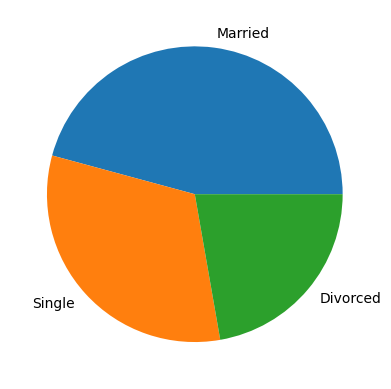

In [29]:
policia_federal.alimentacao(santos_dumont_checkin.nominais['MaritalStatus'])

### Gráfico com colaboradores que apresentaram desgaste

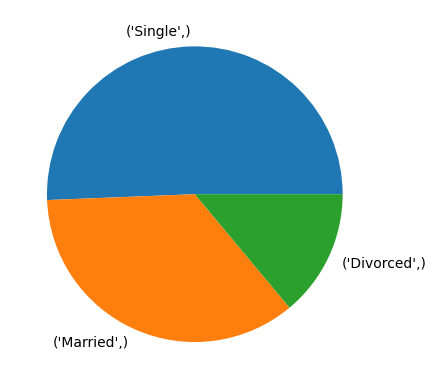

In [30]:
policia_federal.alimentacao(santos_dumont_checkin.nominais[santos_dumont_checkin.nominais['Attrition']=='Yes'][['MaritalStatus']])

### Gráfico com colaboradores que NÃO apresentaram desgaste

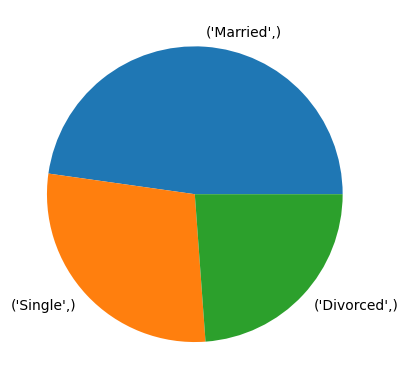

In [31]:
policia_federal.alimentacao(santos_dumont_checkin.nominais[santos_dumont_checkin.nominais['Attrition']=='No'][['MaritalStatus']])

### Resumo Gráficos de pizza

Como esperado, condizente com a nuvem de palavras. A grande maioria dos atributos não apresentam mudanças claras de comportamento a partir do recorte aplicado.

Apenas um atributo chamou a atenção, apresentando mudança clara de compartamento quando olhamos sob o filtro de desgaste dos colaboradores, o "Estado Civil"

Quando olhamos a proporcao de casados, solteiros e divorciados na companhia o número de colaboradores casados é o que prevalece, seguido por solteiros e divorciados. Entranto, quando olhamos sob a lupa de colaboradores com desgaste, o comportamento se inverte.

Dentro da população de colaboradores com desgaste, prevalecem os soteiros. Uma possível explicação pode estar ao fato de que os solteiros podem se dedicar mais ao trabalho, consequentemente ao maior desgaste.

Quando voltamos o nosso olhar para os colaboradores sem desgaste, os casados voltam prevalecer e os divorciados passam a ter uma relevância tão quão aos solteiros.

É provável que colaboradores casados sejam mais demandados por sua família pós expediente, sendo "obrigados" a se desligarem do trabalho para dar atenção aos seus familiares.

Aparentemente, este break pode ser favorável ao desgaste no trabalho

## Transformando Dado Quali em Quanti

Visto que a info de estado civil aparenta ter alguma relação com o desgaste dos colaboradores, iremos transformar esta info em uma variável quantitativa

Para isso iremos criar mais uma coluna, onde:

Solteiros = 0

Divorciados = 1

Casados = 2

In [32]:
santos_dumont_checkin.nominais['estado_civil_cod']='0'
santos_dumont_checkin.nominais.loc[santos_dumont_checkin.nominais.MaritalStatus == 'Divorced', 'estado_civil_cod'] = "1"
santos_dumont_checkin.nominais.loc[santos_dumont_checkin.nominais.MaritalStatus == 'Married', 'estado_civil_cod'] = "2"

In [33]:
# converter coluna_texto para inteiro
santos_dumont_checkin.quantitativos['estado_civil_cod'] = santos_dumont_checkin.nominais['estado_civil_cod'].astype(int)

#removendo a coluna do grupo de variaveis nominais
santos_dumont_checkin.nominais.drop('estado_civil_cod', axis=1, inplace=True)

### Criar clusterizacao para as variaveis quanti

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

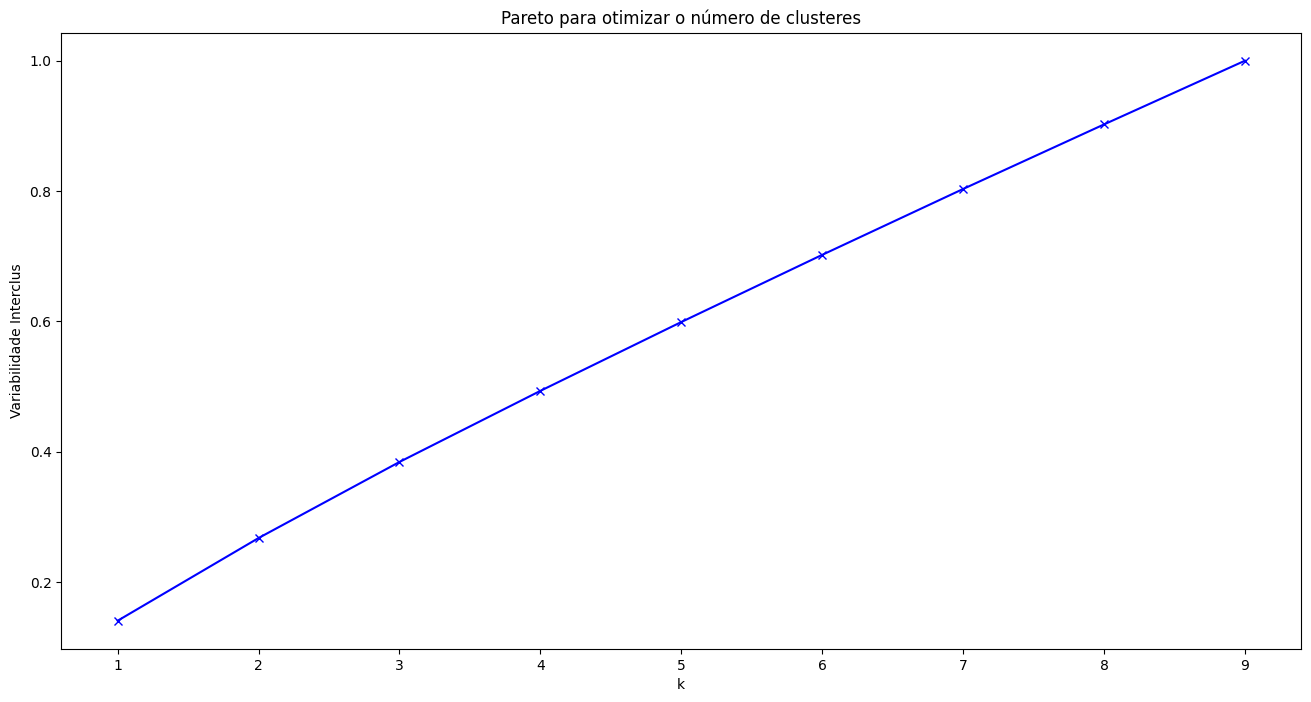

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
santos_dumont_checkin.quantitativos['clusteres']=policia_federal.agrupar_individuos(santos_dumont_checkin.quantitativos)

In [35]:
#criando a propriedade bagagem checkout no obj policia federal
#este atributo sera utilizado em um possivel modelo
policia_federal.unir_as_info(santos_dumont_checkin.quantitativos, santos_dumont_checkin.nominais)

In [36]:
policia_federal.bagagem_checkout.head(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,estado_civil_cod,clusteres,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,3,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,2,4,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,3,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes


## Hipóteses Levantadas

Potenciais Hipóteses a serem exploradas

<Axes: xlabel='clusteres', ylabel='MonthlyIncome'>

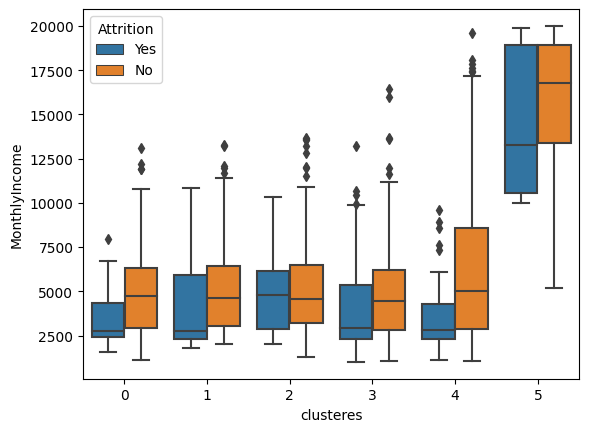

In [37]:
sns.boxplot(data=policia_federal.bagagem_checkout, x='clusteres', y='MonthlyIncome', hue='Attrition')

<Axes: xlabel='clusteres', ylabel='TrainingTimesLastYear'>

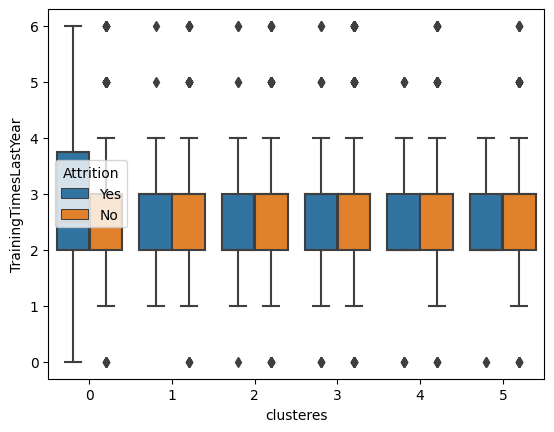

In [38]:
sns.boxplot(data=policia_federal.bagagem_checkout, x='clusteres', y='TrainingTimesLastYear', hue='Attrition')

<Axes: xlabel='clusteres', ylabel='TotalWorkingYears'>

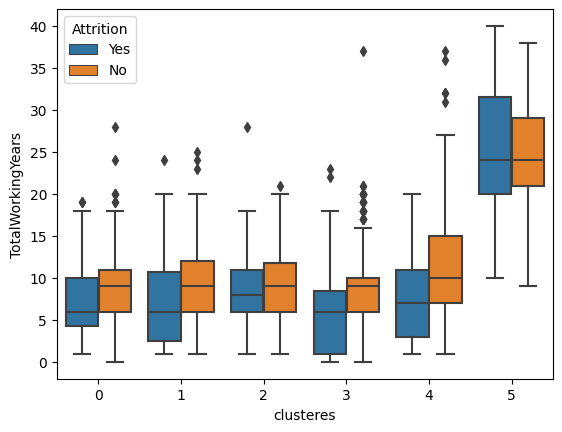

In [39]:
sns.boxplot(data=policia_federal.bagagem_checkout, x='clusteres', y='TotalWorkingYears', hue='Attrition')

Atraves da clusterizacao das variaveis quantitativas, é possivel direcionar os esforços das investigacoes para determinados grupos.

Como podemos obeservar nos gráficos acima existem grupos com maior diferença nas distribuicoes para algumas variaveis considerando o recorte de colaboradores com e sem desgaste.

Estes subgrupos podem ser utilizados e testes de hipótese, direcionamento de variaveis mais e menos relacionadas com o nivel de desgaste, até mesmo compor uma varivável em um potencial modelo preditivo

Ex: o último gráfico se debruça sobre a variável total de anos trabalhados, onde existe um grupo (cluster) de trabalhadores mais experientes, e que possuem uma possivel diferença entre o nivel de desgaste destes colaboradores.

In [40]:
policia_federal.bagagem_checkout.head(3)

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,estado_civil_cod,clusteres,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,3,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7,2,4,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,3,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes


In [41]:
policia_federal.bagagem_checkout['desgaste']=0
policia_federal.bagagem_checkout.loc[policia_federal.bagagem_checkout.Attrition == 'Yes', 'desgaste']=1

evolucao_freq_desgaste=policia_federal.bagagem_checkout.groupby('YearsAtCompany')['desgaste'].sum().reset_index()
evolucao_numero_colaboradores=policia_federal.bagagem_checkout.groupby('YearsAtCompany')['EmployeeNumber'].max().reset_index()

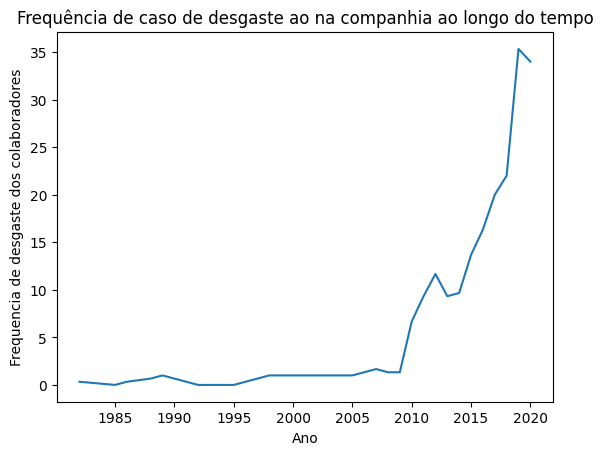

In [42]:
# Plotando o gráfico de linha
media_movel = evolucao_freq_desgaste['desgaste'].rolling(window=3).mean()
plt.plot(2022-evolucao_freq_desgaste['YearsAtCompany'], media_movel)

# Adicionando título e rótulos dos eixos
plt.title("Frequência de caso de desgaste ao na companhia ao longo do tempo")
plt.xlabel("Ano")
plt.ylabel("Frequencia de desgaste dos colaboradores")

# Mostrando o gráfico
plt.show()

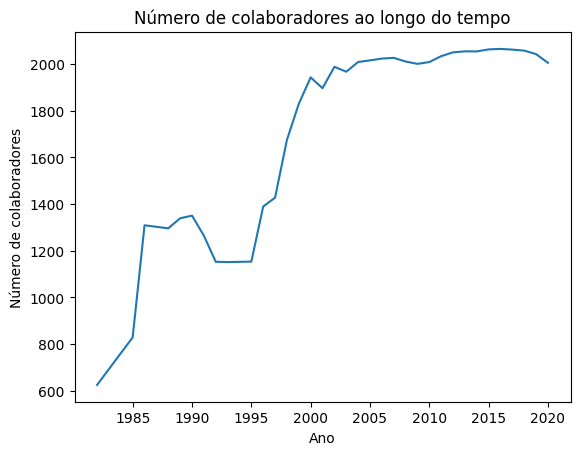

In [43]:
# Plotando o gráfico de linha

media_movel_num_colaboradores = evolucao_numero_colaboradores['EmployeeNumber'].rolling(window=3).mean()
plt.plot(2022-evolucao_numero_colaboradores['YearsAtCompany'], media_movel_num_colaboradores)

# Adicionando título e rótulos dos eixos
plt.title("Número de colaboradores ao longo do tempo")
plt.xlabel("Ano")
plt.ylabel("Número de colaboradores")

# Mostrando o gráfico
plt.show()

A análise acima reflete o comportamento temporal da frequência de desgaste dos colaboradores, apontando um salto considerável do número. Entretando, ainda não é possível concluir esta afirmação, pois o número de colaboradores também cresceu nos últimos anos. Deste modo é possível que a frequência de desgaste dos colaboradores não tenha sofrido alteração real

Para validarmos esta hipótese de aumento do desgaste dos colaboradores ao longo dos anos é necessário anlisarmos a frequência de modo relativo (proporcional ao número de colaboradores)

No gráfico abaixo vemos o gráfico de frequência de desgaste de maneira proporcional, sendo possível confirmar que houve um crescimento deste problema ao longo dos anos. Apesar de o gráfico abaixo chamar a atenção é importante focarmos em sua escala (%) o que em números absolutos (1,75%) representa um valor muito pequeno, ~35 colaboradores (pico máximo) em uma população de >2000 colaboradores

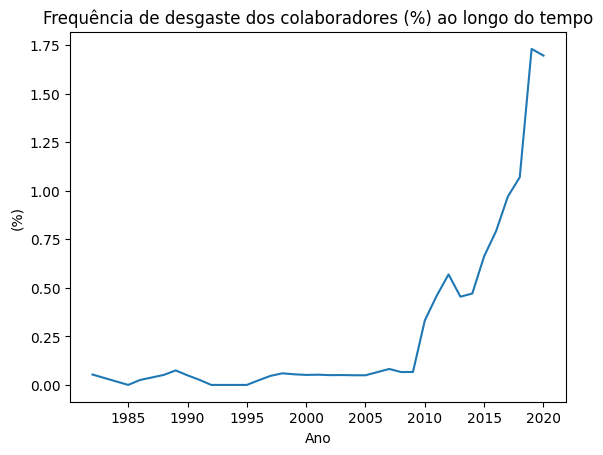

In [44]:
plt.plot(2022-evolucao_numero_colaboradores['YearsAtCompany'], 100*(media_movel/media_movel_num_colaboradores))

# Adicionando título e rótulos dos eixos
plt.title("Frequência de desgaste dos colaboradores (%) ao longo do tempo")
plt.xlabel("Ano")
plt.ylabel("(%)")

# Mostrando o gráfico
plt.show()